In [129]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

X3 = np.array([
    [145, 108],
    [159, 116],
    [173, 126],
    [187, 135],
    [201, 145]
])


X1 = np.array([
    [370, 175],
    [385, 183],
    [400, 191],
    [413, 200],
    [428, 209]
])

X2 = np.array([
    [362, 165],
    [377, 173],
    [391, 182],
    [406, 190],
    [420, 200]
])


X = np.concatenate([X1, X2, X3])

print(X.shape)

(15, 2)


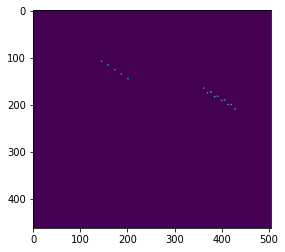

In [130]:
from skimage import morphology

frame = np.zeros((462, 505))

frame[X[:,1], X[:,0]] = 1.0

plt.imshow(morphology.binary_dilation(frame))
plt.show()

(90.0, -90.0, 685.0, -685.0)

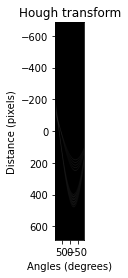

In [34]:
%matplotlib inline

from skimage.transform import hough_line, hough_line_peaks

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.

image = frame.copy()

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(image, theta=tested_angles)


plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap='gray', aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.axis('image')

(1370, 360)


Text(0.5, 1.0, '4 Detected lines')

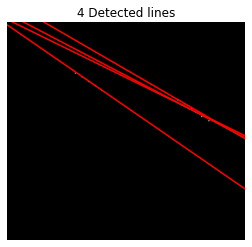

In [65]:
%matplotlib inline

tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
h, theta, d = hough_line(image, theta=tested_angles)

h1 = h

print(h1.shape)

n = 0

origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h1, theta, d, num_peaks=4)):
    n += 1
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')
plt.imshow(morphology.binary_dilation(image), cmap='gray')
plt.xlim(origin)
plt.ylim((image.shape[0], 0))
plt.axis('off')
plt.title(f'{n} Detected lines')

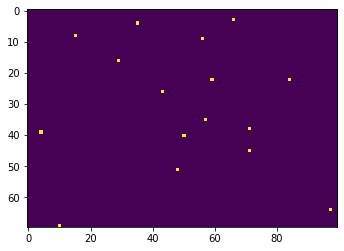

(246, 2880)


Text(0.5, 1.0, '4 Detected lines')

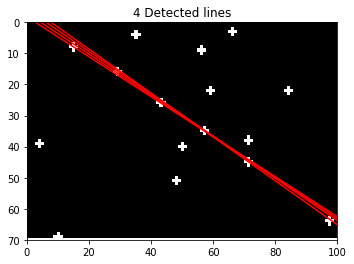

In [137]:
%matplotlib inline

# Perfom analysis on noisy image

image = frame.copy()[100:170,130:230]
image += (np.random.random(size=image.shape) < 1e-3)

plt.imshow(image)
plt.show()

tested_angles = np.linspace(-np.pi/2, np.pi/2, 8*360)
h, theta, d = hough_line(image, theta=tested_angles)

h1 = h * (h > 3)*(h < 6)

print(h1.shape)

n = 0

origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h1, theta, d)):
    n += 1
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')
plt.imshow(morphology.binary_dilation(image), cmap='gray')
plt.xlim(origin)
plt.ylim((image.shape[0], 0))
plt.title(f'{n} Detected lines')